In [2]:
import pandas as pd

In [ ]:
# data_source = "https://archive.ics.uci.edu/dataset/222/bank+marketing"

In [4]:
data = pd.read_csv('/Users/rain/Documents/数分第2期/bank-direct-marketing-campaigns.csv', encoding='utf-8')  # 导入原始数据,指定UTF-8编码

In [40]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [39]:
data['y'] = data['y'].map({'no':0,'yes':1})

In [32]:
data.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [25]:
explore = data.describe(include=None).T 
# explore['null'] = len(data) - explore['count']  # 计算空值数
explore

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [23]:
data.shape

(41188, 20)

In [42]:
data_s = data.select_dtypes(include=['object'])

In [43]:
data_s.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [44]:
for i in range(len(data_s.columns)):
    u = sum(data_s.iloc[:,i] == 'unknown')
    if u > 0:
        print(data_s.columns[i],'缺失率:%.2f%%'%(100*u/36169))
    else:
        pass

job 缺失率:0.91%
marital 缺失率:0.22%
education 缺失率:4.79%
default 缺失率:23.77%
housing 缺失率:2.74%
loan 缺失率:2.74%


In [45]:
data_dummy = pd.get_dummies(data.select_dtypes(include=['object']))
data_oh = pd.concat([data_dummy, data.select_dtypes(exclude=['object'])], axis=1)

In [46]:
data_oh.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0,0,1,0,0,0,0,0,0,...,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,0,0,0,0,0,0,0,1,0,0,...,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,0,0,0,0,0,0,0,1,0,0,...,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,1,0,0,0,0,0,0,0,0,0,...,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,0,0,0,0,0,0,0,1,0,0,...,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [47]:
data_oh.shape

(41188, 63)

In [52]:
# 数据集划分
from sklearn.model_selection import train_test_split

X = data_oh.drop(['y'], axis=1)   
y = data_oh.y                  
#测试集占训练集30%
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=90)

In [53]:
# in this case, we use GBDT(Gradient Boosting Decision Tree)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [54]:
GBDT= GradientBoostingClassifier(random_state=90)
GBDT.fit(Xtrain, ytrain)
GBDT.score(Xtest, ytest)
y_pred= GBDT.predict(Xtest)
#y_predprob= GBDT.predict_proba(Xtest)[:,1]
print("f1 : %.4g" % metrics.f1_score(ytest.values, y_pred))#
#print("AUC Score (Train): %f" % metrics.roc_auc_score(ytest, y_predprob))


f1 : 0.3682


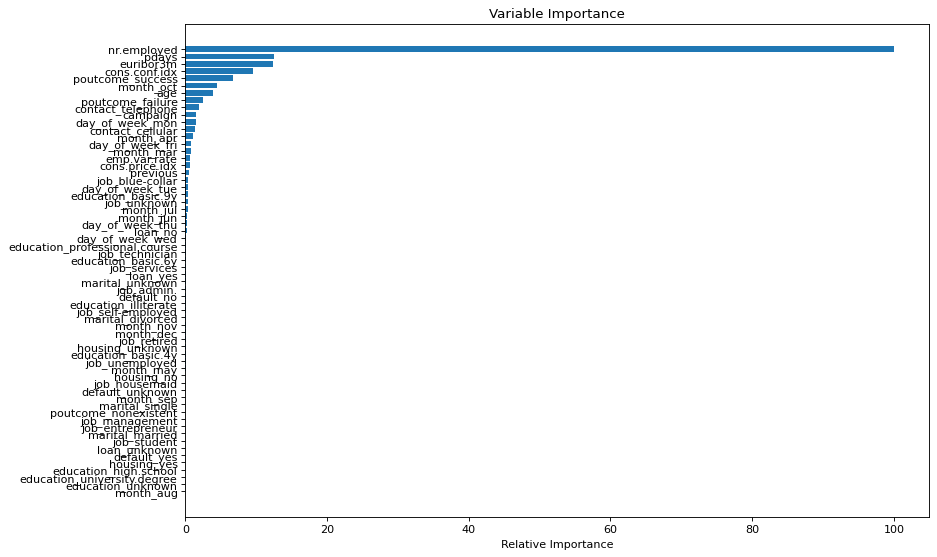

In [55]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Plot feature importance
def plot_feature_importance(clf, feature_names):
    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(12,8), dpi= 80)
    #plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    # plt.yticks(pos, feature_names[sorted_idx])
    plt.yticks(pos, [feature_names[idx] for idx in sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    #plt.savefig("result/特征重要程度.jpg", dpi=300)  # 保存图片到本地
    plt.show()
    
plot_feature_importance(GBDT, Xtrain.columns)

In [ ]:
# Hyperparameters
# GridSearchCV and RandomizedSearchCV from Sklearn

In [56]:
from sklearn.model_selection import GridSearchCV
import numpy as np
# 网格寻参,寻找最优'max_depth'、'min_samples_split'；耗时费力，数据集大的时候不好用

param_grid = {'max_depth':np.arange(10, 20, 5), #决策树最大深度max_depth和内部节点再划分所需最小样本数min_samples_split
              'min_samples_split':np.arange(50, 100, 10)}
print(" param_grid: ", param_grid)

gbdt = GradientBoostingClassifier(random_state=90)
GS = GridSearchCV(gbdt,param_grid,n_jobs=-1,cv=3)
GS.fit(Xtrain,ytrain)
# print('网格搜索-度量记录：',GS.cv_results_)  # 包含每次训练的相关信息
print('网格搜索-最佳度量值:',GS.best_score_)  # 获取最佳度量值
print('网格搜索-最佳参数：',GS.best_params_)  # 获取最佳度量值时的代定参数的值。是一个字典
print('网格搜索-最佳模型：',GS.best_estimator_)  # 获取最佳度量时的分类器模型

 param_grid:  {'max_depth': array([10, 15]), 'min_samples_split': array([50, 60, 70, 80, 90])}
网格搜索-最佳度量值: 0.8976448934664955
网格搜索-最佳参数： {'max_depth': 10, 'min_samples_split': 80}
网格搜索-最佳模型： GradientBoostingClassifier(max_depth=10, min_samples_split=80, random_state=90)


In [57]:
from sklearn.model_selection import RandomizedSearchCV

# 随机策略寻参
param_dist = {
    'learning_rate':np.linspace(0.1,2,20), #步长(learning rate)和迭代次数(n_estimators)
    'n_estimators':range(80,200,4),
    'max_depth':range(2,15,1), #决策树最大深度max_depth和内部节点再划分所需最小样本数min_samples_split、叶子节点最少样本数
    'min_samples_split':range(100,801,200),
    'min_samples_leaf':range(60,101,10),
    'max_features':range(7,20,2), #最大特征数max_features
    'subsample':np.linspace(0.7,0.9,20) #子采样的比例
}

gbdt = GradientBoostingClassifier()
RS = RandomizedSearchCV(gbdt,param_dist,cv = 3,scoring = 'accuracy',n_iter=10,n_jobs = -1)

#在训练集上训练
RS.fit(Xtrain, ytrain)
#返回最优的训练器

#print('网格搜索-度量记录：',RS.cv_results_)  # 包含每次训练的相关信息
print('随机搜索-最佳度量值:',RS.best_score_)  # 获取最佳度量值
print('随机搜索-最佳参数：',RS.best_params_)  # 获取最佳度量值时的代定参数的值。是一个字典
print('随机搜索-最佳模型：',RS.best_estimator_)  # 获取最佳度量时的分类器模型

随机搜索-最佳度量值: 0.899587278465647
随机搜索-最佳参数： {'subsample': 0.8052631578947368, 'n_estimators': 116, 'min_samples_split': 500, 'min_samples_leaf': 100, 'max_features': 13, 'max_depth': 3, 'learning_rate': 0.1}
随机搜索-最佳模型： GradientBoostingClassifier(max_features=13, min_samples_leaf=100,
                           min_samples_split=500, n_estimators=116,
                           subsample=0.8052631578947368)


In [62]:
RS.best_estimator_ = GradientBoostingClassifier(max_depth=10, min_samples_split=80, random_state=90)

In [63]:
# Modelling
GBDT = RS.best_estimator_
GBDT.fit(Xtrain, ytrain)
GBDT.score(Xtest, ytest)
y_pred= GBDT.predict(Xtest)

print("f1 : %.4g" % metrics.f1_score(ytest.values, y_pred))
#print("AUC Score (Train): %f" % metrics.roc_auc_score(ytest, y_predprob))

f1 : 0.3927


In [60]:
# 模型保存与载入
!pip install joblib
import joblib
joblib.dump(GBDT, "/Users/rain/Documents/数分第2期/BankMarket/GBDT.model")
GBDT = joblib.load("/Users/rain/Documents/数分第2期/BankMarket/GBDT.model")


[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [61]:
# 载入测试集，结果输出

data_test = pd.read_csv('/home/aistudio/test.csv')
id = data_test.id
data_test.drop(['id'], axis=1, inplace=True)
data_test_dummy = pd.get_dummies(data_test.select_dtypes(include=['object']))
data_test_oh = pd.concat([data_test_dummy, data_test.select_dtypes(exclude=['object'])], axis=1)

pred = GBDT.predict(data_test_oh)
#data['subscribe'] = data['subscribe'].map({'no':0,'yes':1})
#pred = pred.map({0:'no',1:'yes'})
data_out = pd.DataFrame(pred,index=id, columns=['subscribe'])
print(data_out)
#data_out.drop('pred0', axis=1, inplace=True)
data_out['subscribe'] = data_out['subscribe'].map({0:'no',1:'yes'})
data_out.to_csv('/home/aistudio/202031070336.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/home/aistudio/test.csv'